In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('diabetes.csv')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [65]:
mean_value = df['Age'].mean()
print(mean_value)

33.240885416666664


In [67]:
median_value = df['Age'].median()
print(median_value)

29.0


In [68]:
mode_value = df['Age'].mode()
print(mode_value)

0    22
Name: Age, dtype: int64


In [70]:
variance = df['Age'].var()
print(variance)

138.30304589037365


In [73]:
standard_deviation = df['Age'].std()
print(standard_deviation)

11.76023154067868


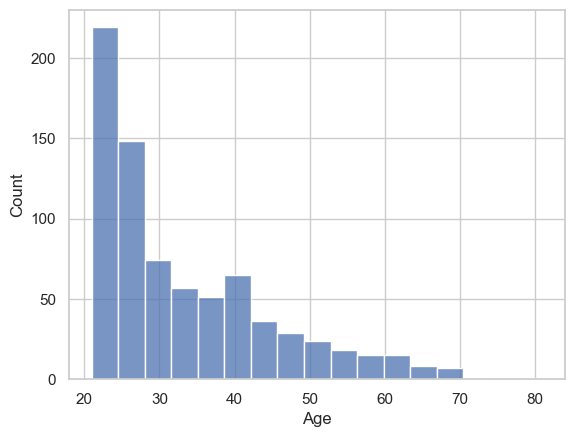

In [80]:
plt.figure() 
sns.histplot(df, x="Age") 
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

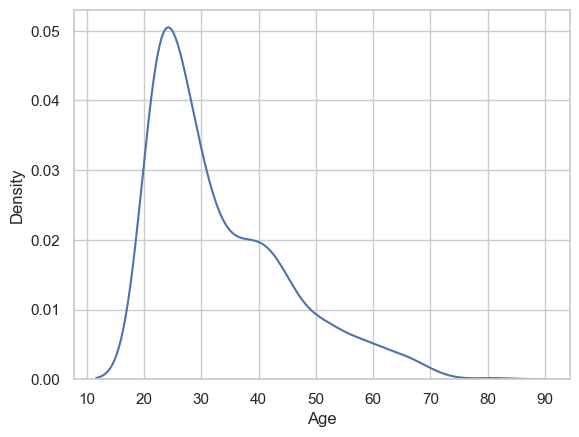

In [82]:
sns.kdeplot(data=df, x="Age") #plotting the estimated probability density function 

In [85]:
covariance_value = df['Age'].cov(df['Outcome'])
print(covariance_value)

1.3369526836158199


In [86]:
covariance_value = df['Pregnancies'].cov(df['Outcome'])
print(covariance_value)

0.3566180465015208


In [87]:
covariance_value = df['Glucose'].cov(df['Outcome'])
print(covariance_value)

7.115079041720988


In [91]:
correlation_value = df['Age'].corr(df['Outcome'])
print(correlation_value)

0.23835598302719754


In [93]:
correlation_value = df['Pregnancies'].corr(df['Outcome'])
print(correlation_value)

0.22189815303398613


In [94]:
correlation_value = df['Glucose'].corr(df['Outcome'])
print(correlation_value)

0.46658139830687295


In [161]:
from ydata_profiling import ProfileReport
profile = ProfileReport (df, title="Pandas Profiling Report", explorative = True)
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

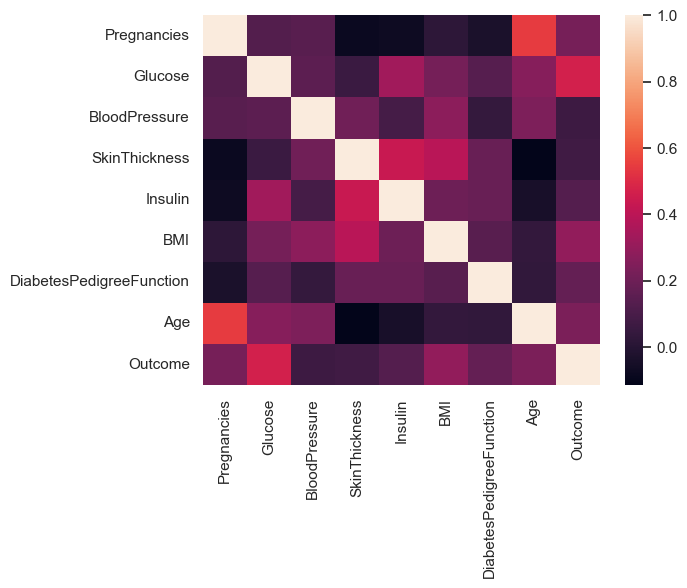

In [160]:
plt.figure() 
sns.set_theme(style="whitegrid")
sns.heatmap(df.corr())
plt.show()

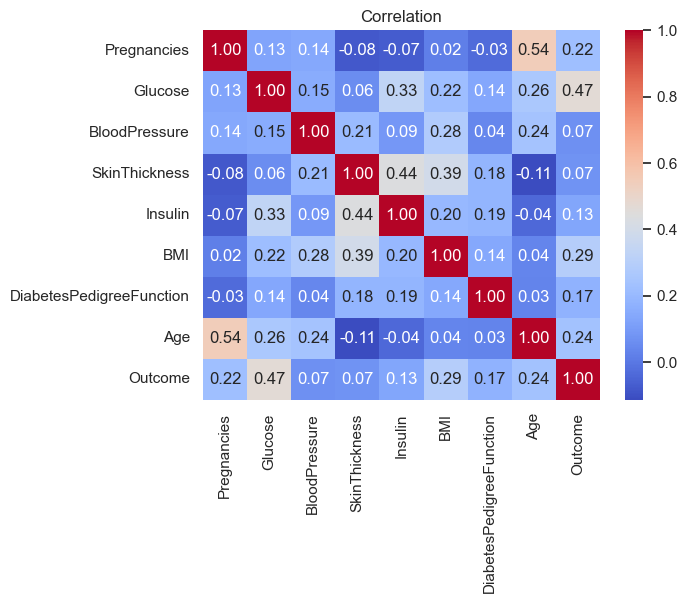

In [57]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()

In [53]:
sorted = outcome_correlations.abs().sort_values(ascending=False)
print(sorted)

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


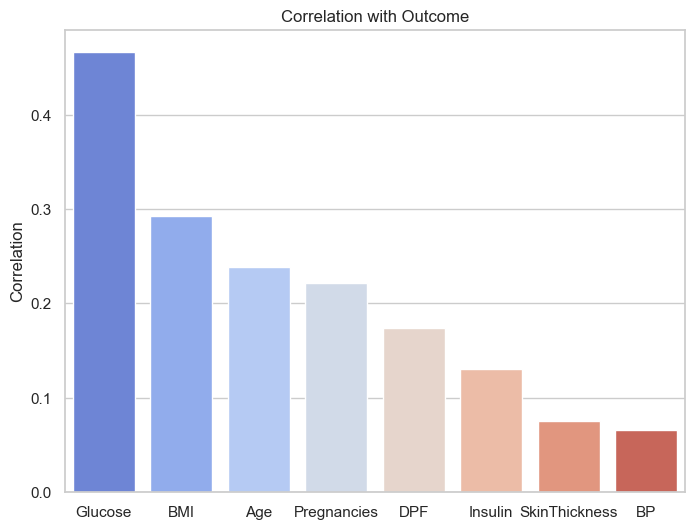

In [162]:
sorted.index = sorted.index.str.replace('DiabetesPedigreeFunction', 'DPF')
sorted.index = sorted.index.str.replace('BloodPressure', 'BP')
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted.index, y=sorted.values, palette='coolwarm')
plt.title('Correlation with Outcome')
plt.ylabel('Correlation')
plt.show()

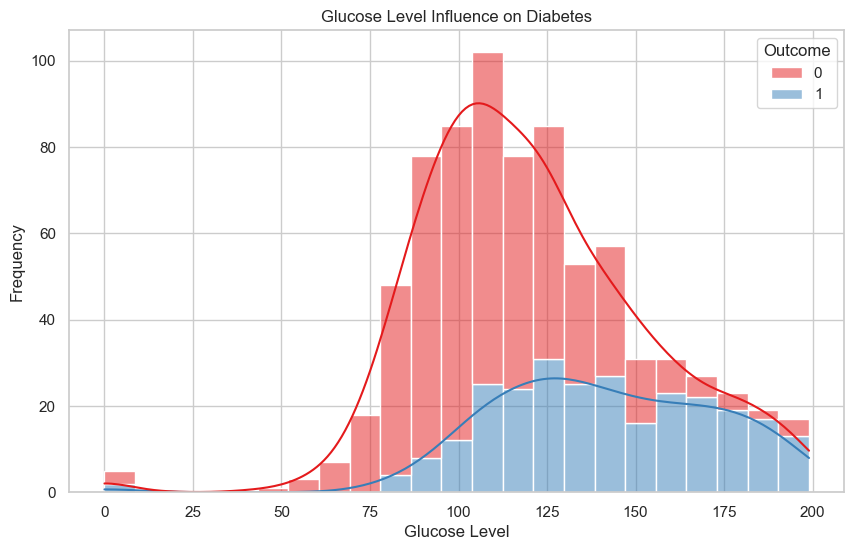

In [155]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', multiple='stack', kde=True, palette='Set1')
plt.title('Glucose Level Influence on Diabetes')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


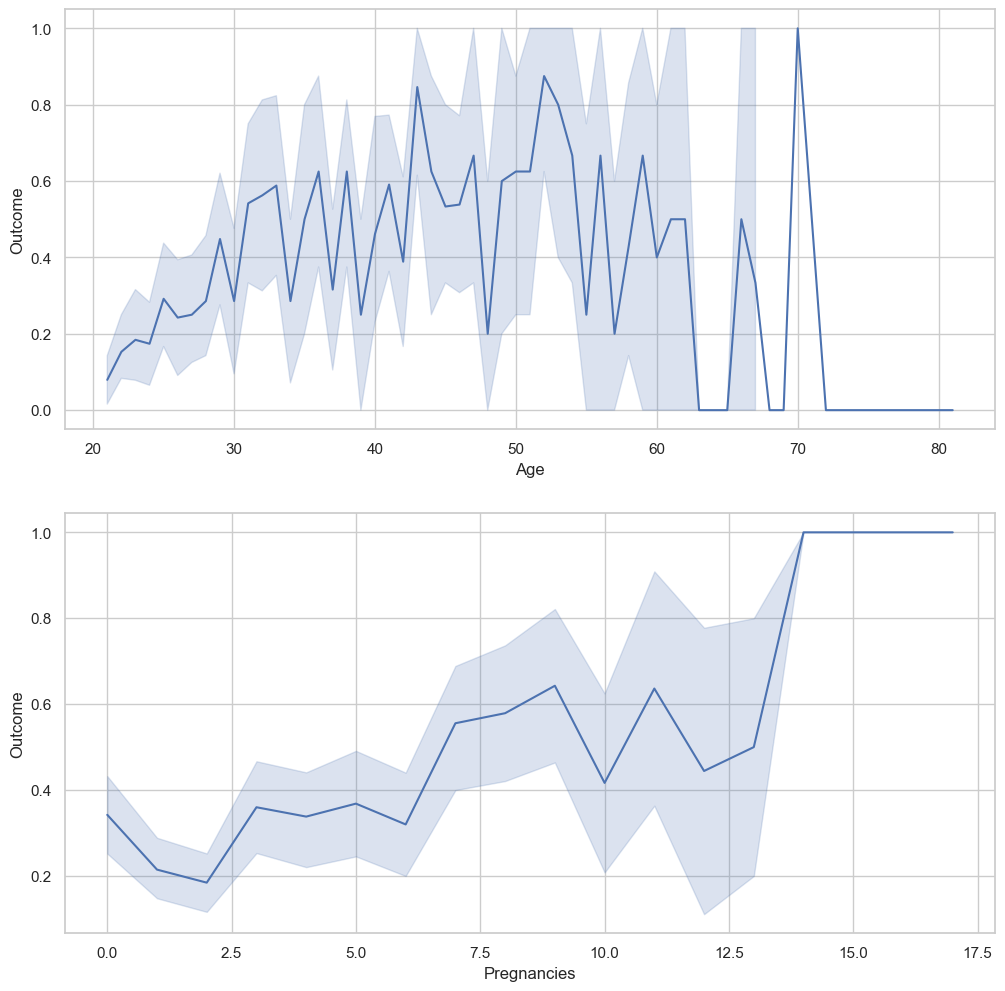

In [166]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 1, 1)  
ax2 = fig.add_subplot(2, 1, 2)    

sns.lineplot(data=df, x="Age", y="Outcome", ax = ax1)

sns.lineplot(data=df, x="Pregnancies", y="Outcome", ax = ax2)

plt.show()